In [1]:
import pandas as pd
import numpy as np
import datetime

# Visualization
import matplotlib.pyplot as plt
import descartes
import geopandas

In [3]:
# Datos de entrenamiento
train = pd.read_csv('../data/train.csv', low_memory=False, \
                    encoding = 'utf-8', index_col='id', parse_dates=['fecha'])

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240000 entries, 254099 to 121958
Data columns (total 22 columns):
titulo                        234613 non-null object
descripcion                   238381 non-null object
tipodepropiedad               239954 non-null object
direccion                     186928 non-null object
ciudad                        239628 non-null object
provincia                     239845 non-null object
antiguedad                    196445 non-null float64
habitaciones                  217529 non-null float64
garages                       202235 non-null float64
banos                         213779 non-null float64
metroscubiertos               222600 non-null float64
metrostotales                 188533 non-null float64
idzona                        211379 non-null float64
lat                           116512 non-null float64
lng                           116512 non-null float64
fecha                         240000 non-null datetime64[ns]
gimnasio           

In [5]:
train.sample(3)

,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,banos,...,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
id,,,,,,,,,,,,,,,,,,,,,
175950,casa en venta colonia la cima,casa preciosa nueva en pre venta con terminado...,Casa,Colonia La Cima,Zapopan,Jalisco,NaN,3.0,2.0,3.0,...,47944.0,NaN,NaN,2015-04-05,0.0,0.0,0.0,0.0,0.0,2860000.0
119805,bonita casa en vistas palmillas.,"casa en vistas palmillas, 3 recamaras 1 baño c...",Casa,Calle Loma Blanca No.26858 Interior #30 Vistas...,Tijuana,Baja California Norte,4.0,3.0,1.0,1.0,...,2632.0,NaN,NaN,2015-12-01,0.0,0.0,0.0,0.0,0.0,399000.0
123758,"residencias nuevas fracc. el manantial, 3 reca...","residencias nuevas, cochera 4 autos, sala, com...",Casa,Fraccionamiento el Manantial,Tlajomulco de Zúñiga,Jalisco,0.0,3.0,NaN,4.0,...,49072.0,20.567218,-103.461231,2016-12-24,1.0,0.0,1.0,1.0,1.0,6200000.0


In [6]:
tipopropiedades = train.groupby('tipodepropiedad').size() \
    .sort_values(ascending=False).to_frame('cantidad')
tipopropiedades

,cantidad
tipodepropiedad,
Casa,141717
Apartamento,57341
Casa en condominio,19297
Terreno,9945
Local Comercial,3055
Oficina comercial,1741
Bodega comercial,1406
Edificio,1396
Terreno comercial,1326


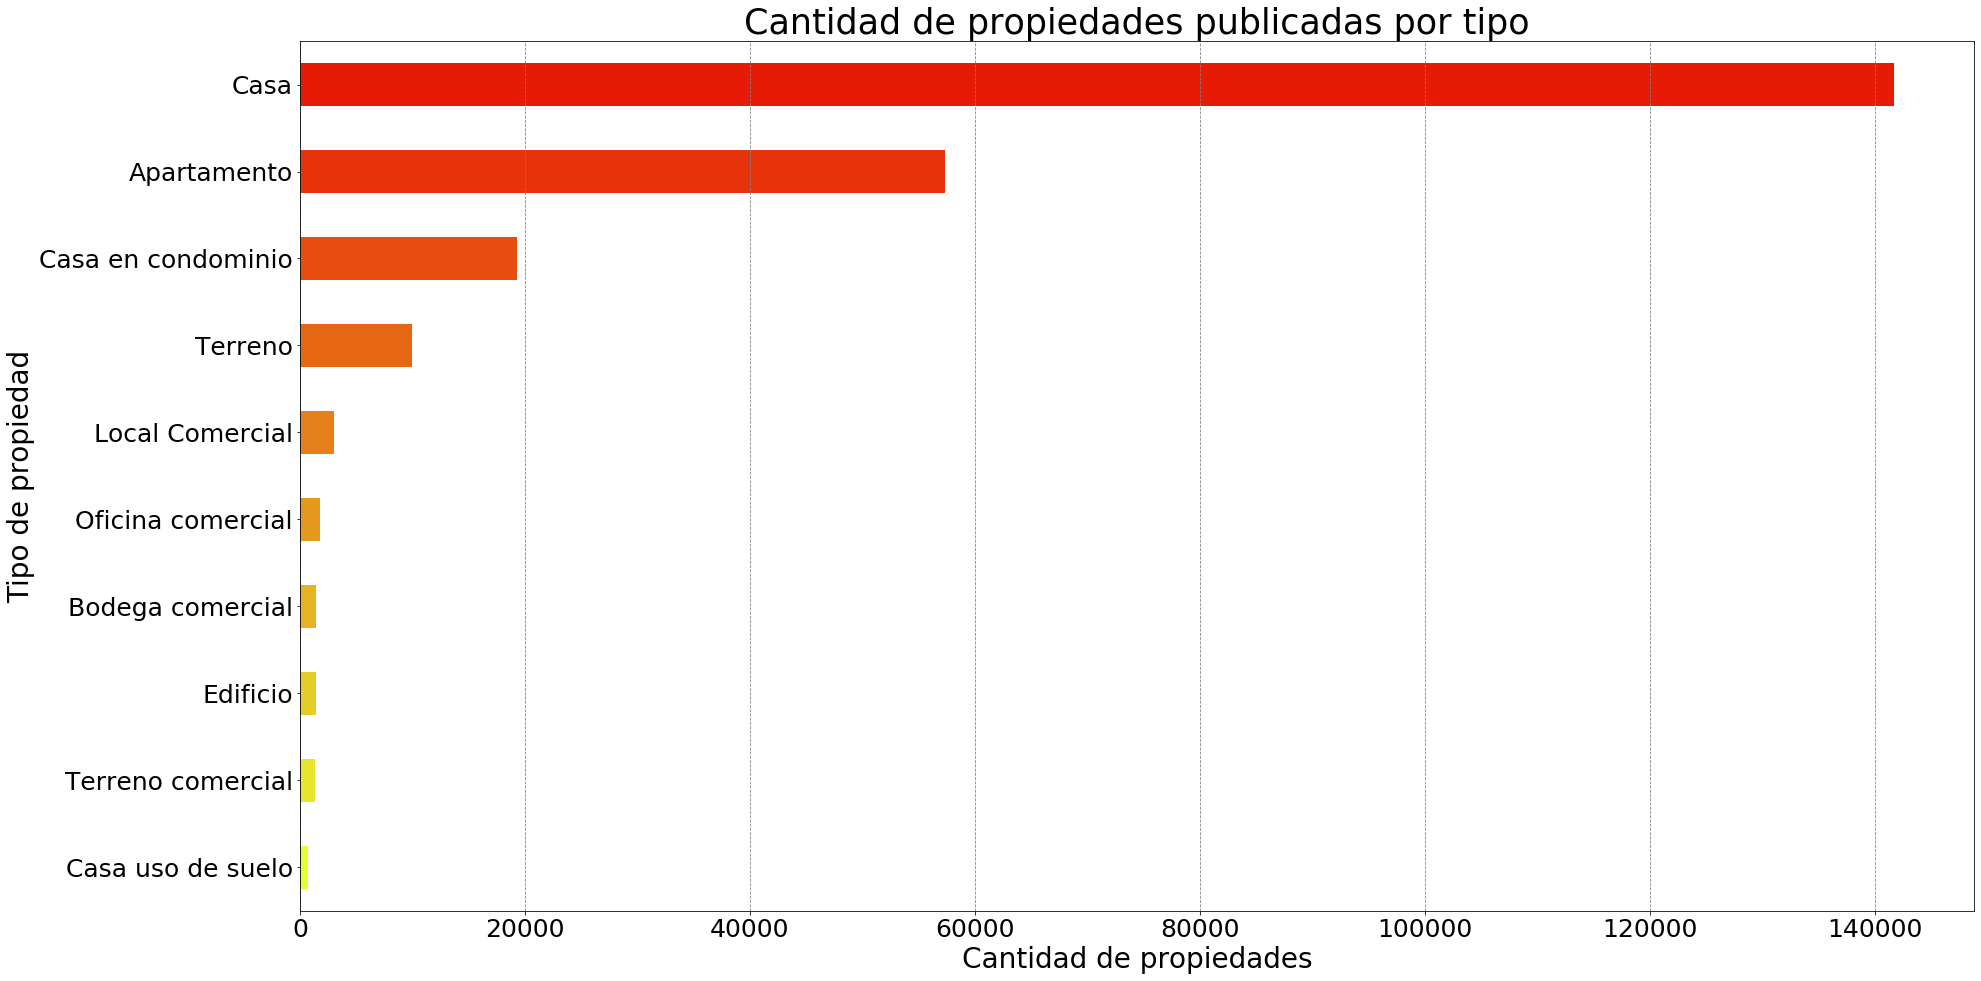

In [7]:
colorsh = []
i = 10
while i != 0:
    colorsh.append((0.9, (i*2)/20, i/50))
    i -= 1

plt = tipopropiedades.sort_values(by='cantidad').tail(10)['cantidad'].plot(kind = 'barh', color = colorsh,\
    figsize = (30, 16), fontsize = 25)
plt.set_xlabel('Cantidad de propiedades', fontsize = 28)
plt.set_ylabel('Tipo de propiedad', fontsize = 28)
plt.set_title('Cantidad de propiedades publicadas por tipo', fontsize = 35)
plt.grid(linestyle = 'dashed', color = 'gray')
plt.yaxis.grid(False);

In [39]:
provincias = train.groupby('provincia')['antiguedad','habitaciones','garages','banos', \
                                         'metroscubiertos','metrostotales'].mean()
provincias['cantidad'] = train.groupby('provincia').size()
provincias

,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,cantidad
provincia,,,,,,,
Aguascalientes,7.524580,3.096447,1.541806,2.120382,176.184227,173.284826,1753
Baja California Norte,5.788405,2.580032,1.613046,1.365226,94.006675,128.017080,3220
Baja California Sur,2.459770,2.633838,1.684280,1.606195,113.391197,182.840849,1700
Campeche,3.914573,2.835749,0.944444,1.963351,164.229592,204.650655,263
Chiapas,5.412871,3.031926,1.324211,2.206164,175.109879,179.228690,1126
Chihuahua,6.518198,3.039927,1.445773,2.133979,199.484038,213.807702,4590
Coahuila,6.306214,3.004758,1.538726,2.138187,198.050117,208.891884,3695
Colima,5.674877,2.790287,1.317982,2.038245,157.389075,178.943596,1008
Distrito Federal,12.189608,2.740684,1.420075,1.986249,156.449348,161.503146,58790


In [29]:
train.groupby('provincia').sum()

,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,idzona,lat,lng,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
provincia,,,,,,,,,,,,,,,
Aguascalientes,11633.0,4880.0,2305.0,3329.0,279252.0,278642.0,6.052638e+07,23883.590271,-1.118017e+05,86.0,110.0,168.0,984.0,854.0,2.589512e+09
Baja California Norte,15675.0,8140.0,4723.0,4295.0,295745.0,382259.0,9.319219e+07,55048.498456,-1.980587e+05,41.0,34.0,54.0,1517.0,1520.0,2.471162e+09
Baja California Sur,3852.0,4172.0,2550.0,2541.0,182900.0,275724.0,4.181732e+07,24817.258955,-1.153414e+05,11.0,5.0,73.0,483.0,230.0,2.067970e+09
Campeche,779.0,587.0,204.0,375.0,32189.0,46865.0,4.735278e+06,2606.028923,-1.238800e+04,4.0,1.0,7.0,73.0,59.0,4.131514e+08
Chiapas,5467.0,2944.0,1258.0,2076.0,173709.0,172418.0,1.967401e+07,7695.096312,-4.289882e+04,33.0,8.0,32.0,376.0,234.0,2.166566e+09
Chihuahua,18805.0,11725.0,5079.0,8378.0,849802.0,855017.0,4.272449e+08,58946.658029,-2.153591e+05,117.0,27.0,93.0,1212.0,929.0,8.007396e+09
Coahuila,19688.0,10105.0,4927.0,7195.0,679708.0,682032.0,1.081370e+08,49453.874068,-1.959385e+05,87.0,24.0,51.0,1588.0,1038.0,5.562104e+09
Colima,4608.0,2528.0,1202.0,1812.0,141178.0,152281.0,9.487953e+06,11195.823360,-6.056384e+04,15.0,22.0,92.0,385.0,258.0,1.543631e+09
Distrito Federal,630800.0,147912.0,74091.0,106163.0,8738009.0,6160053.0,3.414342e+11,647385.955047,-3.304767e+06,4410.0,4044.0,2627.0,28118.0,26185.0,2.041015e+11


In [48]:
mexstates = geopandas.read_file('../data/estados_mexico.shp');
mexstates.head()

,ADMIN_NAME,OBJECTID,FIPS_ADMIN,GMI_ADMIN,FIPS_CNTRY,GMI_CNTRY,CNTRY_NAME,POP_ADMIN,TYPE_ENG,TYPE_LOC,SQKM,SQMI,COLOR_MAP,Shape_Leng,Shape_Area,geometry
0,Aguascalientes,1057,MX01,MEX-AGS,MX,MEX,Mexico,782890,State,Estado,5609.14,2165.69,4,2.807425,0.489324,POLYGON ((-101.8462066646057 22.01176071158773...
1,Baja California,2304,MX02,MEX-BCN,MX,MEX,Mexico,1806829,State,Estado,72725.41,28079.28,7,19.898878,6.831258,(POLYGON ((-115.0172424311931 31.9544296261265...
2,Baja California Sur,2327,MX03,MEX-BCS,MX,MEX,Mexico,345682,State,Estado,72278.30,27906.65,8,26.273035,6.500703,(POLYGON ((-112.7232818599697 27.9997406003486...
3,Campeche,1086,MX04,MEX-CMP,MX,MEX,Mexico,582193,State,Estado,50234.82,19395.66,6,13.547013,4.294054,(POLYGON ((-90.37896728551169 20.8632316585143...
4,Chiapas,1182,MX05,MEX-CHP,MX,MEX,Mexico,3524501,State,Estado,73771.48,28483.17,10,12.835232,6.223150,(POLYGON ((-92.10794067392283 15.4375972749944...


In [61]:
columnas = ['antiguedad','habitaciones','garages','banos','metroscubiertos','metrostotales','cantidad']
mexstates[columnas] = provincias.reset_index()[columnas]
mexstates.head()

,ADMIN_NAME,OBJECTID,FIPS_ADMIN,GMI_ADMIN,FIPS_CNTRY,GMI_CNTRY,CNTRY_NAME,POP_ADMIN,TYPE_ENG,TYPE_LOC,...,Shape_Leng,Shape_Area,geometry,cantidad,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales
0,Aguascalientes,1057,MX01,MEX-AGS,MX,MEX,Mexico,782890,State,Estado,...,2.807425,0.489324,POLYGON ((-101.8462066646057 22.01176071158773...,1753,7.524580,3.096447,1.541806,2.120382,176.184227,173.284826
1,Baja California,2304,MX02,MEX-BCN,MX,MEX,Mexico,1806829,State,Estado,...,19.898878,6.831258,(POLYGON ((-115.0172424311931 31.9544296261265...,3220,5.788405,2.580032,1.613046,1.365226,94.006675,128.017080
2,Baja California Sur,2327,MX03,MEX-BCS,MX,MEX,Mexico,345682,State,Estado,...,26.273035,6.500703,(POLYGON ((-112.7232818599697 27.9997406003486...,1700,2.459770,2.633838,1.684280,1.606195,113.391197,182.840849
3,Campeche,1086,MX04,MEX-CMP,MX,MEX,Mexico,582193,State,Estado,...,13.547013,4.294054,(POLYGON ((-90.37896728551169 20.8632316585143...,263,3.914573,2.835749,0.944444,1.963351,164.229592,204.650655
4,Chiapas,1182,MX05,MEX-CHP,MX,MEX,Mexico,3524501,State,Estado,...,12.835232,6.223150,(POLYGON ((-92.10794067392283 15.4375972749944...,1126,5.412871,3.031926,1.324211,2.206164,175.109879,179.228690


In [178]:
mexstates['ADMIN_NAME']

0          Aguascalientes
1         Baja California
2     Baja California Sur
3                Campeche
4                 Chiapas
5               Chihuahua
6                Coahuila
7                  Colima
8        Distrito Federal
9                 Durango
10         Edo. de México
11             Guanajuato
12               Guerrero
13                Hidalgo
14                Jalisco
15              Michoacán
16                Morelos
17                Nayarit
18             Nuevo León
19                 Oaxaca
20                 Puebla
21              Querétaro
22           Quintana Roo
23        San Luis Potosí
24                Sinaloa
25                 Sonora
26                Tabasco
27             Tamaulipas
28               Tlaxcala
29               Veracruz
30                Yucatán
31              Zacatecas
Name: ADMIN_NAME, dtype: object

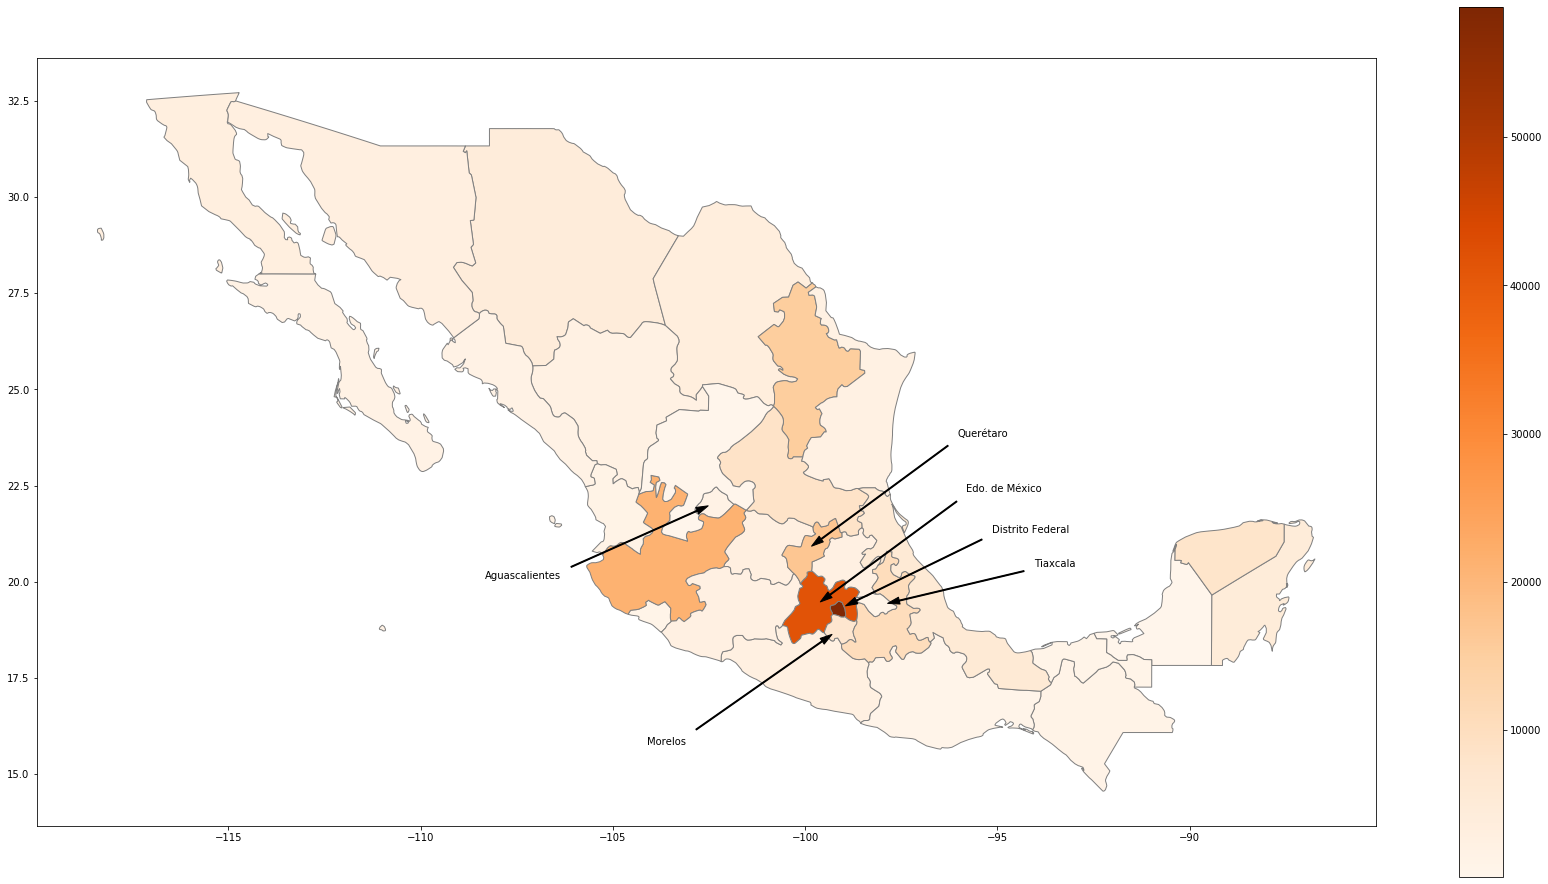

In [195]:
def plot_mexico(gdf, column, cmap='Oranges'):
    gdf['coords'] = gdf['geometry'].apply(lambda x: x.representative_point().coords[:])
    gdf['coords'] = [coords[0] for coords in gdf['coords']]
    plt = gdf.plot(column='cantidad', legend=True, cmap='Oranges', edgecolor='gray', figsize = (30, 16));
    arrowprops = dict(color='black', width=1, headwidth=7, shrink=0.05)

    plt.annotate(s='Distrito Federal', xy=gdf['coords'][8], \
                 xytext=(gdf['coords'][8][0]+4,gdf['coords'][8][1]+2), arrowprops=arrowprops);
    plt.annotate(s='Edo. de México', xy=gdf['coords'][10], \
                 xytext=(gdf['coords'][10][0]+4,gdf['coords'][10][1]+3), arrowprops=arrowprops); 
    plt.annotate(s='Querétaro', xy=gdf['coords'][21], \
                 xytext=(gdf['coords'][21][0]+4,gdf['coords'][21][1]+3), arrowprops=arrowprops);  
    plt.annotate(s='Tiaxcala', xy=gdf['coords'][28], \
                 xytext=(gdf['coords'][28][0]+4,gdf['coords'][28][1]+1), arrowprops=arrowprops); 
    plt.annotate(s='Morelos', xy=gdf['coords'][16], \
                 xytext=(gdf['coords'][16][0]-5,gdf['coords'][16][1]-3), arrowprops=arrowprops); 
    plt.annotate(s='Aguascalientes', xy=gdf['coords'][0], \
                 xytext=(gdf['coords'][0][0]-6,gdf['coords'][0][1]-2), arrowprops=arrowprops); 
    
plot_mexico(mexstates, 'cantidad')

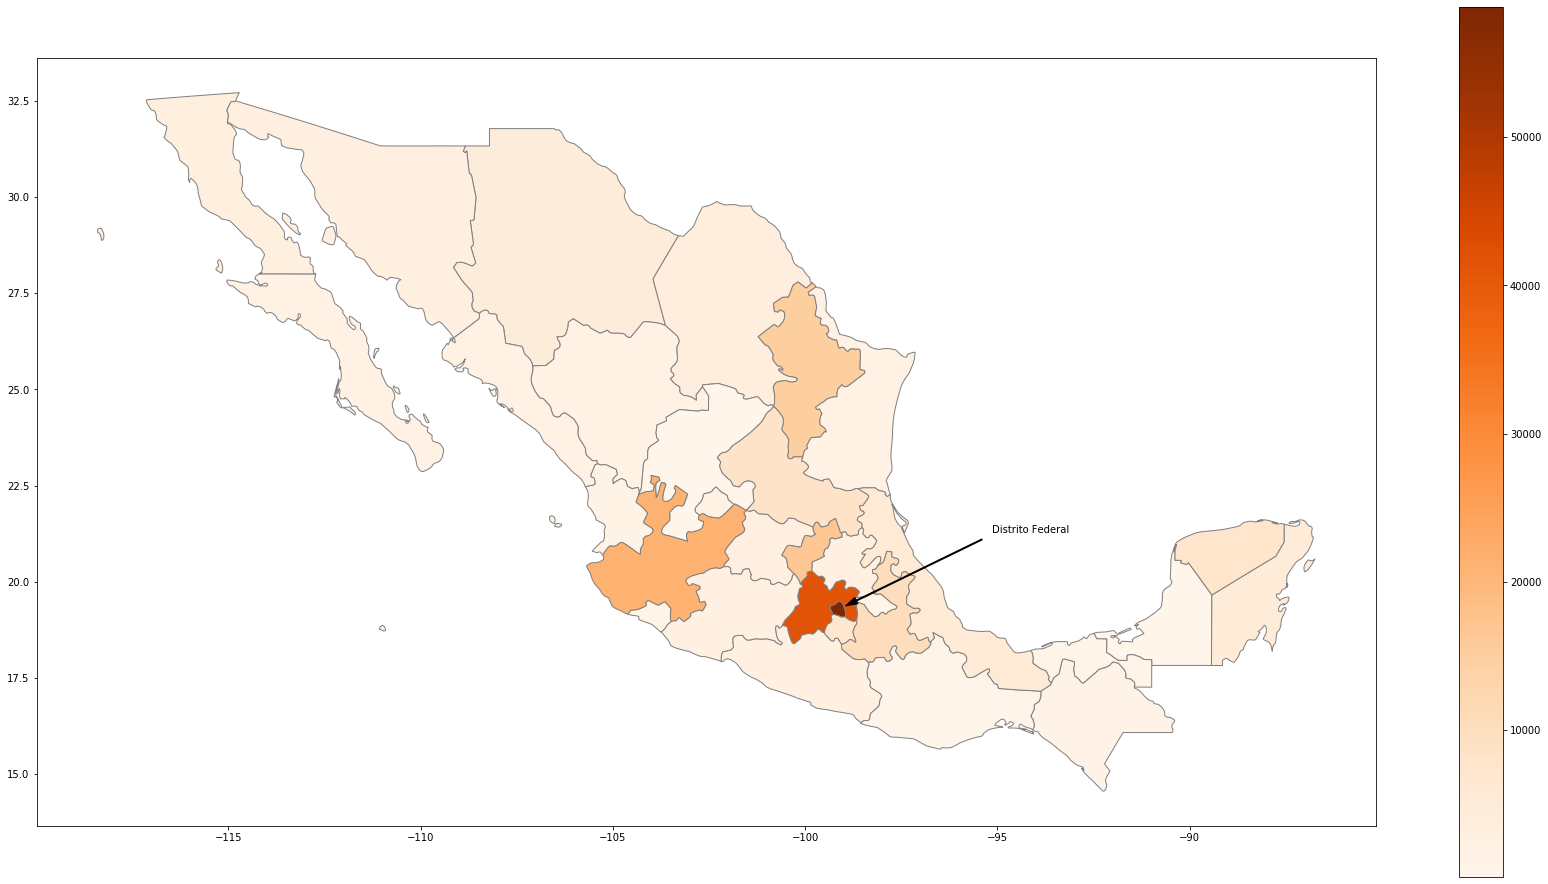

In [173]:
mexstates['coords'] = mexstates['geometry'].apply(lambda x: x.representative_point().coords[:])
mexstates['coords'] = [coords[0] for coords in mexstates['coords']]
plt = mexstates.plot(column='cantidad', legend=True, cmap='Oranges', edgecolor='gray', figsize = (30, 16));

plt.annotate(s='Distrito Federal', xy=mexstates['coords'][8], \
             xytext=(mexstates['coords'][8][0]+4,mexstates['coords'][8][1]+2), \
             arrowprops=dict(facecolor='black', width=1, headwidth=7, shrink=0.05));
# for idx, row in mexstates.iterrows():
#     plt.annotate(s=row['ADMIN_NAME'], xy=row['coords'],
#                  horizontalalignment='center')

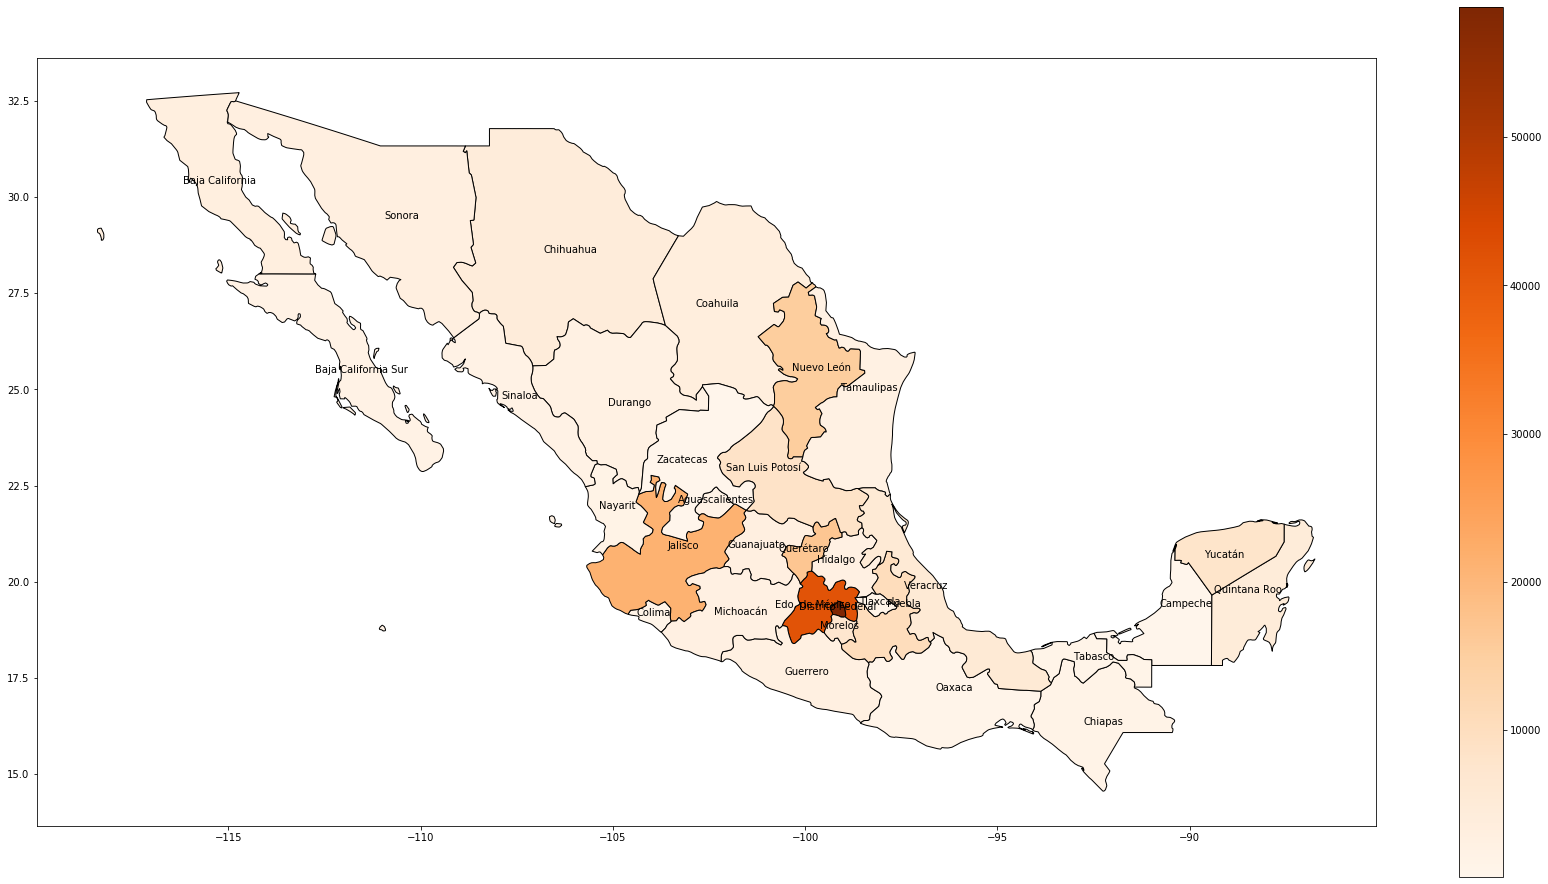

In [143]:
mexstates['coords'] = mexstates['geometry'].apply(lambda x: x.representative_point().coords[:])
mexstates['coords'] = [coords[0] for coords in mexstates['coords']]
plt = mexstates.plot(column='cantidad', legend=True, cmap='Oranges', edgecolor='black', figsize = (30, 16));

for idx, row in mexstates.iterrows():
    plt.annotate(s=row['ADMIN_NAME'], xy=row['coords'],
                 horizontalalignment='center')

In [46]:
mexstates.sort_values(by='ADMIN_NAME')['cantidad'] = provincias.cantidad
mexstates

,OBJECTID,FIPS_ADMIN,GMI_ADMIN,ADMIN_NAME,FIPS_CNTRY,GMI_CNTRY,CNTRY_NAME,POP_ADMIN,TYPE_ENG,TYPE_LOC,SQKM,SQMI,COLOR_MAP,Shape_Leng,Shape_Area,geometry
0,888,MX06,MEX-CHH,Chihuahua,MX,MEX,Mexico,2656214,State,Estado,247935.02,95727.70,12,22.609277,22.890985,"POLYGON ((-103.63085937506 26.66107940648959, ..."
1,933,MX07,MEX-CDZ,Coahuila,MX,MEX,Mexico,2145539,State,Estado,150843.95,58240.87,2,18.993090,13.733655,"POLYGON ((-102.6669464107481 25.0758323669703,..."
2,976,MX19,MEX-NLE,Nuevo León,MX,MEX,Mexico,3370912,State,Estado,65173.05,25163.31,3,15.426171,5.844668,POLYGON ((-99.71389770501492 27.66893768322768...
3,978,MX28,MEX-TML,Tamaulipas,MX,MEX,Mexico,2272724,State,Estado,79502.24,30695.81,11,18.023144,7.056563,"POLYGON ((-98.616088867607 22.41849136378556, ..."
4,998,MX25,MEX-SIN,Sinaloa,MX,MEX,Mexico,2397706,State,Estado,57638.85,22254.36,5,16.466051,5.145524,POLYGON ((-108.3941802981821 25.14110946612914...
5,1004,MX10,MEX-DRN,Durango,MX,MEX,Mexico,1467826,State,Estado,120674.60,46592.46,4,17.512895,10.764853,POLYGON ((-104.3114318851732 22.31921005270192...
6,1026,MX32,MEX-ZCT,Zacatecas,MX,MEX,Mexico,1383680,State,Estado,74995.58,28955.79,7,19.712770,6.605460,POLYGON ((-101.5248565673766 21.85663986243986...
7,1034,MX24,MEX-SLP,San Luis Potosí,MX,MEX,Mexico,2179006,State,Estado,64140.09,24764.49,1,13.951424,5.620107,POLYGON ((-98.51501464830721 21.39888763445691...
8,1051,MX14,MEX-JLS,Jalisco,MX,MEX,Mexico,5772704,State,Estado,79851.44,30830.64,8,20.993489,6.900025,POLYGON ((-104.5924224855091 19.14794158903328...
9,1057,MX01,MEX-AGS,Aguascalientes,MX,MEX,Mexico,782890,State,Estado,5609.14,2165.69,4,2.807425,0.489324,POLYGON ((-101.8462066646057 22.01176071158773...


In [22]:
mexstates.groupby('ADMIN_NAME').size() \
    .sort_values()

ADMIN_NAME
Aguascalientes         1
Veracruz               1
Tlaxcala               1
Tamaulipas             1
Tabasco                1
Sonora                 1
Sinaloa                1
San Luis Potosi        1
Quintana Roo           1
Queretaro              1
Puebla                 1
Oaxaca                 1
Nuevo Leon             1
Nayarit                1
Morelos                1
Michoacan              1
Mexico                 1
Jalisco                1
Hidalgo                1
Guerrero               1
Guanajuato             1
Durango                1
Distrito Federal       1
Colima                 1
Coahuila               1
Chihuahua              1
Chiapas                1
Campeche               1
Baja California Sur    1
Baja California        1
Yucatan                1
Zacatecas              1
dtype: int64

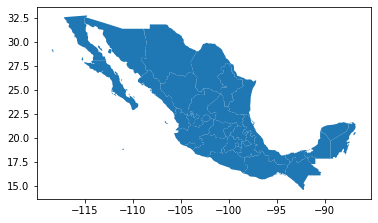

In [10]:
mexstates.plot()